### Loading of different packagaes and APIs

In [6]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# sns.set(style="whitegrid")
import warnings 
from sklearn.svm import SVC, NuSVC
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors  import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
import xgboost as xgb
from scipy import stats
from scipy.stats import uniform, randint
from sklearn.metrics import f1_score
from sklearn.model_selection import KFold, StratifiedKFold, RepeatedStratifiedKFold
from sklearn.metrics import roc_curve, auc, accuracy_score
# from tflearn.data_utils import to_categorical
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report
from scipy import interp
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from keras.utils import to_categorical

### Utility Functions

In [7]:
Renamed_feature= []               #list of names that will rename to feature column
all_clf_res=[]                    #every classifier auc values are stored in it
random_initializer=100            #random initializer
n_dots=50
##########################################################

for i in range(8):
  #for renaming dataset of columns features F1 -- F8 
  Renamed_feature.append('F'+str(i+1)) 
############################################################

# Pairs plots are just showing all variables paired with all the other variables
def pair_plot(data):
  '''
  This function will create a grid of Axes such that each variable
  in data will by shared in the y-axis across a single row and in the x-axis
  across a single column.The diagonal Axes are treated differently, drawing 
  a plot to show the univariate distribution of the data for the variable in
  that column.
  Parameters :
  Input - data is the pandas type variable for 
  plotting pair plot of features in this
  dataframe 
  
  Output :
  This function Plot pairwise relationships in a dataset.
  '''
  plt.figure()
  
  pair_plot =sns.pairplot(data=data,            
                          height=3,
                          hue='Outcome',  
                          diag_kind='kde')
  pair_plot.fig.suptitle("Pairplot of all features")
  plt.show()




###################################################################
# this function for Gaussian distribution plot 
# and box plot simultaneously in a figure
def Box_Gaussian(data):
  '''
  Parameters :
  Input - data is the pandas type variable

  Output - The Gaussian distribution plot for
  eight feature of input data 
  '''
  
  fig=plt.figure(figsize=(15,6))                                #define figure size
  fig.suptitle("Box Gaussian plot of all features")
  
  n_scaler = preprocessing.StandardScaler()                 #standardization function
  temp_Data = n_scaler.fit_transform(data)                  #pass into function for standrd.
  for i in range(8):                                        #loop for all 8 feature 
    
    plt.subplot(2, 4, i+1)                                  #subplot for 2 rows in 4 columns
    Data = temp_Data[:,i]                                   #data for every feature
    sns.kdeplot(Data, shade=True,color='red', alpha=0.3)    #kernel density function under red shaded arae
    ax = sns.boxplot(Data, saturation=0.9, color="green")   #boxplot  with green shaded area
                                                            # https://seaborn.pydata.org/generated/seaborn.kdeplot.html
                                                            # https://seaborn.pydata.org/generated/seaborn.boxplot.html
    plt.gca().invert_yaxis()                                #Reverse Y-Axis in PyPlot
    # plt.title('F'+str(i+1))
    frame1 = plt.gca()
    frame1.axes.xaxis.set_ticklabels([])                    #removing xlabel data 
    plt.ylim((-0.5,0.65))                                   #y axis  limit
    plt.tight_layout()                                      #This module provides routines to adjust subplot params so that subplots are nicely fit in the figure.
                                                            # https://matplotlib.org/api/tight_layout_api.html
    # plt.grid('on')
    
    for patch in ax.artists:
      r, g, b, a = patch.get_facecolor()                     #Get the facecolor of the Axes.
      patch.set_facecolor((r, g, b, 0.3))                    #set colour intensity
#############################################################


def plot_confusionMatrix(data):
  '''
  Parameters :
  Input - data is the pandas type variable

  Output -visualization of correalation matrix of
  input data 
  '''
  sns.set(font_scale=1.15)                                    # Set aesthetic parameters in one step.
  ax = plt.figure(figsize=(10, 8))                            #set figure size   https://seaborn.pydata.org/generated/seaborn.set.html
  plt.title("Confusion Matrix of all features")
  sns.heatmap(data.corr(),                                    # input correlation matrix  of dataset
              vmax=1.0,                                       #Values to anchor the colormap, otherwise they are inferred from
                                                              #the data and other keyword arguments.
              vmin=0.0,
              linewidths=0.01,
              square=False,                                   #If True, set the Axes aspect to “equal” so each cell will be square-shaped.
              annot=True,                                     #If True, write the data value in each cell. 
              linecolor="black")                              #Color of the lines that will divide each cell.            
                                                              #https://seaborn.pydata.org/generated/seaborn.heatmap.html
  b, t = plt.ylim()                                           # discover the values for bottom and top
  b += 0.5                                                    # Add 0.5 to the bottom
  t -= 0.5                                                    # Subtract 0.5 from the top
  plt.ylim(b, t)                                              # update the ylim(bottom, top) values
  plt.show() 



############################################################
# this function plot univariate distribution of 
# every feature

def dist_Plot(data):
  '''
  Parameters :
  Input - data is the pandas type variable

  Output - The distribution plot for
  eight feature of input data 
  '''
  fig, ax = plt.subplots(2,4, figsize=(12,5))                 #set numbers of rows and columns of subplot
  sns.set()
  sns.distplot(data.F1, bins = 10, ax=ax[0,0])                #Flexibly plot a univariate distribution of observations.
  sns.distplot(data.F2, bins = 10, ax=ax[0,1]) 
  sns.distplot(data.F3, bins = 10, ax=ax[0,2]) 
  sns.distplot(data.F4, bins = 10, ax=ax[0,3])
  sns.distplot(data.F5, bins = 10, ax=ax[1,0]) 
  sns.distplot(data.F6, bins = 10, ax=ax[1,1]) 
  sns.distplot(data.F7, bins = 10, ax=ax[1,2]) 
  sns.distplot(data.F8, bins = 10, ax=ax[1,3]) 
  fig.suptitle("Gaussian Distribution of all features")
  fig.tight_layout()                                          #This module provides routines to adjust subplot params
                                                              #  so that subplots are nicely fit in the figure.
                                                        

############################################################
# this function plot violin plot  of 
# every feature


def plot_violinplot (data):
  '''
  Parameters :
  Input - data is the pandas type variable

  Output - The violinplot plot for
  eight feature of input data 
  '''

  # A violin plot is a method of plotting numeric data.
  # It is similar to box plot with a rotated kernel 
  # density plot on each side. Violin plots are similar
  # to box plots, except that they also show the probability
  # density of the data at different values (in the simplest
  # case this could be a histogram).
  fig, ax = plt.subplots(2,4, figsize=(12,6))          
  # #set numbers of rows and columns of subplot and figure size 
  sns.set()
  sns.violinplot(x = data.Outcome, y=data.F1,  ax=ax[0,0])    #violine plot for F1 feature
  sns.violinplot(x = data.Outcome, y=data.F2,  ax=ax[0,1])    #violine plot for F2 feature 
  sns.violinplot(x = data.Outcome, y=data.F3,  ax=ax[0,2])    #violine plot for F3 feature 
  sns.violinplot(x = data.Outcome, y=data.F4,  ax=ax[0,3])    #violine plot for F4 feature
  sns.violinplot(x = data.Outcome, y=data.F5,  ax=ax[1,0])    #violine plot for F5 feature 
  sns.violinplot(x = data.Outcome, y=data.F6,  ax=ax[1,1])    #violine plot for F6 feature 
  sns.violinplot(x = data.Outcome, y=data.F7,  ax=ax[1,2])    #violine plot for F7 feature 
  sns.violinplot(x = data.Outcome, y=data.F8,  ax=ax[1,3])    #violine plot for F8 feature 
  fig.suptitle("Violin plot of all features")
  fig.tight_layout()

                                                              # https://seaborn.pydata.org/generated/seaborn.violinplot.html

############################################################


#this function  is for manual outleir rejection
def Manual (data):

    '''
    Parameters :
    Input - data is the pandas type variable

    Return - dataframe with outleir rejection
    of input data 
    '''
    # input dataset is data 
    max_Pregnancies = data.F1.max()                         #maximum feature of F1
    data = data[data.F1!=max_Pregnancies]                   #find  where extreme value is absent and remove extreme
    max_Glucose = data.F2.max()                             #maximum feature of F2  
    data = data[data.F2!=max_Glucose]                       #find  where extreme value is absent and remove
    for i in range(4):                                      #in this loop we succesively remove 4 minimum element 
      min_Glucose = data.F2.min()                           #find minimum
      data = data[data.F2!=min_Glucose]                     #reject minimum
    max_BloodPressure = data.F3.max()                       #maximum feature of F3
    data = data[data.F3!=max_BloodPressure]                 #find  where extreme value is absent and remove
    for i in range(2):                                      #in this loop we succesively remove 2 extreme element  
      max_skinthickness = data.F4.max() 
      data = data[data.F4!=max_skinthickness]
    for i in range(25):                                     #in this loop we succesively remove 25 extreme element  
      max_Insulin = data.F5.max() 
      data = data[data.F5!=max_Insulin]
    max_bmi = data.F6.max()
    data = data[data.F6!=max_bmi]
    for i in range(4):                                      #in this loop we succesively remove 4 minimum element  
      min_bmi = data.F6.min() 
      data = data[data.F6!=min_bmi]
    for i in range(20):                                     #in this loop we succesively remove 20 extreme element 
      max_DiabetesPedigreeF = data.F7.max()
      data = data[data.F7!=max_DiabetesPedigreeF]
    for i in range(20):                                     #in this loop we succesively remove 20 extreme element  
      max_age = data.F8.max() 
      data = data[data.F8!=max_age]
      df =data
    return data

############################################################

# this function if for outlair rejection with
# respect to mean value
def IQR_Mean (data):

  '''
  Parameters :
  Input - data is the pandas type variable

  Return - dataframe with outleir rejection
  filled with mean
  of input data 
  '''
  for i in range(8): 
    x = data[Renamed_feature[i]]
    Q1 = x.quantile(0.25)                                   # Q1 is the "middle" value in the first half of the rank-ordered data set.
    Q3 = x.quantile(0.75)                                   # Q3 is the "middle" value in the second half of the rank-ordered data set.
    IQR = Q3-Q1                                             # The interquartile range is equal to Q3 minus Q1.
    mean = x.mean()                                         #mean of feature 
    for j in range(569):                                    # loop for first 569 elements of feature
      temp = x[j]                                           # every feature value
      LW = (Q1 - 1.5 * IQR)                                 #lower considerable range of gaussian distribution
      UW = (Q3 + 1.5 * IQR)                                 #upper considerable range of gaussian distribution
      if temp < LW:                                         #replace upper value with mean
        x[j] = mean
      if temp > UW:                                         #replace lower value with mean
        x[j] = mean
    data[Renamed_feature[i]] = x
  return data

############################################################
# this function if for outlair rejection with
# respect to median value same as previous function
def IQR_Median (data): 
  '''
  Parameters :
  Input - data is the pandas type variable

  Return - dataframe with outleir rejection
  filled with median of input data 
  '''
  for i in range(8):
    x = data[Renamed_feature[i]]
    Q1 = x.quantile(0.25)
    Q3 = x.quantile(0.75)
    IQR = Q3-Q1
    median = x.quantile(0.5)                                # find the median
    for j in range(569):                                    #replace the first 569 values with respect to median
      temp = x[j]
      LW = (Q1 - 1.5 * IQR)
      UW = (Q3 + 1.5 * IQR)
      if temp < LW:                                         #replace upper value with median
        x[j] = median
      if temp > UW:
        x[j] = median                                       #replace upper value with median
    data[Renamed_feature[i]] = x
  return data

############################################################



# this function if for outlair rejection with
# 1.5 times of IQR that means that are
# significant in gaussian distribution
def IQR (data):

  '''
  Parameters :
  Input - data is the pandas type variable

  Return - dataframe with outleir rejection
  of input data 

  '''
  #input dataset as data
  for i in range(8):                                        # for every feature
    Q1 = data[Renamed_feature[i]].quantile(0.25)
    Q3 = data[Renamed_feature[i]].quantile(0.75)
    IQR = Q3-Q1                                             #find IQR
    LW = (Q1 - 1.5 * IQR)                                   #find lower boundary
          # print(LW)
    UW = (Q3 + 1.5 * IQR)                                   #find upper boundary
          # print(UW)
    data = data[data[Renamed_feature[i]]<UW]                #drop greater than upper limit
    data = data[data[Renamed_feature[i]]>LW]                #drop smaller than lower limit

  return data


############################################################
#outlier rejection with different condition

def outlier_Rejection (data, iqr_Mean, iqr_Medain, iqr, manual):
  '''
  Parameters :
  Input - 
  data is the pandas type variable
  iqr_Mean - for outleir rejection with Mean
  iqr_Medain- for outleir rejection with Medain
  iqr- for drop the outleir 
  manual -for manual rejection 
  Return - dataframe with outleir rejection
  filled with Input parameter

  '''
  
  # outlier_Rejection with conditional input
  if iqr_Mean == True:                                     #reject outleir with Mean
    data = IQR_Mean (data)
  if iqr_Medain == True:                                   #reject outleir with Median
    data = IQR_Medain (data)
  if iqr == True:                                          #reject outleir in IQR range
    data = IQR (data)
  if manual == True:                                       #reject outleir with manual
    data = Manual (data)

  return data

############################################################

#data plot on different input condition 
def data_plot (data,
               Pair_plot,
               Dist_Plot,
               Plot_violinplot,
               Plot_confusionMatrix,
               box_Gaussian):
  
  '''
  Parameters :
  Input - 
  data - It is the pandas type variable
  Pair_plot - for pair plot visualization of input  data  
  Dist_Plot- for gaussian distribution plot visualization of input  data  
  Plot_violinplot- for violin plot visualization of input  data  
  Plot_confusionMatrix -for confusion matrix visualization of input  data   
  
  Output - dataframe with outleir rejection
  filled with Input parameter

  '''
  if Pair_plot ==True:
    pair_plot(data)

  if Dist_Plot ==True:
    dist_Plot(data)

  if Plot_violinplot ==True:
    plot_violinplot (data)

  if Plot_confusionMatrix ==True:
    plot_confusionMatrix(data)

  if box_Gaussian ==True:
    Box_Gaussian(data)


############################################################


def replace_zero(data, field, target):
    
    mean_by_target = data.loc[data[field] != 0, [field, target]].groupby(target).mean()
    data.loc[(data[field] == 0)&(data[target] == 0), field] = mean_by_target.iloc[0][0]
    data.loc[(data[field] == 0)&(data[target] == 1), field] = mean_by_target.iloc[1][0]


############################################################


def metrics (y_true, y_pred, probas_):


  '''
  Parameters :
  Input - 
  y_true - true  value of input data    
  y_pred- predicted  value of input data  
  probas_- probability/confidence of predicted output

  return -True Negative(tn),False Positive(fp),False Negative(fn)
  True positive(tp),AUC(roc_auc),False Positive Rate(fpr),
  True positive rate(tpr)

  '''


  points=n_dots*'-'
  print(points)
#    print("Best parameters set found on development set:")
#    print(clf.best_params_)
  fpr, tpr, thresholds = roc_curve(y_true, probas_[:, 1])
  tprs.append(interp(mean_fpr, fpr, tpr))
  tprs[-1][0] = 0.0
  roc_auc = auc(fpr, tpr)
  #  aucs.append(roc_auc)
  print("Detailed classification report for current fold:")
  print()
  print(classification_report(y_true, y_pred))
  print()
  print("Area Under ROC (AUC): {}".format(roc_auc))
  print()
  print('Confusion Matrix for current fold: ')
  print(confusion_matrix(y_true, y_pred))
  print()
  print("Accuracy for Current Fold: {}".format(accuracy_score(y_true, y_pred)))
  print()
  tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

  return  tn, fp, fn, tp, roc_auc, fpr, tpr

############################################################


def average_ROC(mean_fpr,tprs,aucs,TP,TN,FP,FN):

  '''
  Parameters :
  mean_fpr - Mean False positive rate
  tprs -values of true positive rate
  aucs  - values of auc
  TP    - True positive 
  TN    - True Negative
  FP    - False Positiv
  FN    - False Negative

  Output - 
  Visalization of TPR vs FPR plot
  '''
  sen = (np.sum(TP))/(np.sum(TP)+np.sum(FN))
  spe = (np.sum(TN))/(np.sum(TN)+np.sum(FP))

  mean_tpr = np.mean(tprs, axis=0)
  mean_tpr[-1] = 1.0
  # mean_auc = auc(mean_fpr, mean_tpr)
  mean_auc = np.mean(aucs)
  std_auc = np.std(aucs)
  # plt.figure(figsize=(8, 5))
  # plt.grid(True)
  ax = plt.axes()
  ax.grid(color='lightgray', linestyle='-', linewidth=.5)
  # Setting the background color
  ax.set_facecolor("white")
  
  ax.spines['bottom'].set_color('#000000')
  ax.spines['top'].set_color('#000000') 
  ax.spines['right'].set_color('#000000')
  ax.spines['left'].set_color('#000000')

  plt.plot(mean_fpr, mean_tpr, color='blue',
          label=r'Avg. ROC (AUC (avg $\pm$ std) = %0.3f $\pm$ %0.3f)' % (mean_auc, std_auc),
          lw=2, alpha=.8)
  
  plt.scatter((1-spe), sen, s=80, c='r', marker='x',)
  plt.scatter(0, sen, s=80, c='r', marker='x',)
  plt.scatter((1-spe),0, s=80, c='r', marker='x',)
  plt.axhline(y=sen, color='r', linestyle='--')
  plt.axvline(x=(1-spe), color='r', linestyle='--')
  plt.text((1-spe), 0.02, "FPR={:0.3f}".format((1-spe)))
  plt.text(0.009, sen+0.05, "TPR={:0.3f}".format(sen))

  std_tpr = np.std(tprs, axis=0)
  tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
  tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
  plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='darkgray', alpha=0.5,
                  label=r'$\pm$ 1 Standard deviation')

  plt.xticks(np.arange(0.0, 1.01, step=0.1))
  plt.yticks(np.arange(0.0, 1.01, step=0.1))
  left=0.0
  right=1.0
  plt.xlim(left, right)
  plt.ylim(left, right)
  plt.xlabel('False Positive Rate (FPR)')
  plt.ylabel('True Positive Rate (TPR)')
  plt.legend(loc="lower right")
  # plt.grid(True)
  plt.show()
   
############################################################

def plot_Current_ROC(fpr,tpr,iterator,roc_auc):
  
  '''
  Parameters :
  Input - 
  fpr - False positive rate
  tpr - True positive rate
  roc_auc -auc values of roc curve

  Output - 
  Visalization of current roc curve

  '''
  plt.plot(fpr,
          
          tpr,
          # Color[iterator],
          alpha=0.35,
          # label='macro-average ROC (AUC = {0:0.3f})'.format(roc_auc)
          # +FOLD[iterator],
          linewidth=1)
   
############################################################

   
def creat_Model (classifier, X_Train, Y_Train, tuned_parameters, verbose):

  '''
  Parameters :
  Input - 
  X_Train -train data 
  Y_Train - label/output of train data
  tuned_parameters =parameters of models
  verbose = condition about model

  Output - 
  Returned a tuned classifier using grid search
  '''
  clf = GridSearchCV(classifier,
                    tuned_parameters,
                    verbose=verbose,
                    cv=5,
                    scoring='roc_auc',
                    n_jobs=-1)
  clf.fit(X_Train, Y_Train)
  return clf
############################################################

def average_performance(aucs,Accuracy,TP,TN,FP,FN): 

  '''
  Parameters :
  Input - 
  aucs= values of aucs
  Accuracy - value of accuracy
  TP  - True Positive
  TN  - True Negative
  FP  - False Positive
  FN  - False Negative


  Output - 
  It prints the average aucs,accuarcy,confusion matrix
  '''

  print()
  n_dotsav=(n_dots-len('Average'))//2
    
  print('-'*n_dotsav+'Average'+'-'*n_dotsav)
  print("AUC (Avg. +/- Std.) is  %0.3f +/- %0.3f" %(np.mean(aucs),np.std(aucs)))
  print("Accuracy (Avg. +/- Std.) is  %0.3f +/- %0.3f" %(np.mean(Accuracy),np.std(Accuracy)))
  cm = [[int(np.mean(TP)), int(np.mean(FP))],[int(np.mean(FN)), int(np.mean(TN))]]
  print ('Avg. CM is '+str(cm))
  cm = [[int(np.sum(TP)), int(np.sum(FP))],[int(np.sum(FN)), int(np.sum(TN))]]
  print ('Total for all folds CM is '+str(cm))
  re_auc=str(round(np.mean(aucs), 3))+'+/-'+str(round(np.std(aucs),3))
  all_clf_res.append(re_auc)
    
############################################################

#this  function is for algorithm based feature selection 
def feature_Selector(data, algo, n_feature):
    '''
    Parameters :
    Input - 
    data - It is the pandas type variable
    algo - type of algorith PCA,ICA,Correlation


    Output - 
    It prints the average aucs,accuarcy,confusion matrix
    '''
    if algo=='PCA':                                                   #for pca algorithm
        X_Data= data.iloc[:,:8].values
        pca = PCA(n_components=n_feature)                             #number of feature
        X_Data = pca.fit_transform(X_Data)
        return X_Data , data.iloc[:,8:].values

    if algo == 'ICA':
        X_Data= data.iloc[:,:8].values
        ICA = FastICA(n_components=n_feature, random_state=12) 
        X_Data = ICA.fit_transform(X_Data)
        return X_Data , data.iloc[:,8:].values
    
    if algo =='corr':                                                   #for ica algorithm
        if n_feature ==4:
            data = data[['F2','F5','F4','F6','Outcome']]                #for 4 feature
            return data.iloc[:,:4].values, data.iloc[:,4:].values
        if n_feature ==6:
            data = data[['F1','F2','F4','F5','F6','F8','Outcome']]       #for 6 feature
            return data.iloc[:,:6].values, data.iloc[:,6:].values
        
    if algo == 'None':
        return data.iloc[:,:8].values, data.iloc[:,8:].values            #if feature selection is off all features are counted

### Read the data from the drive using pandas (Python Data Analysis Library)

In [8]:
data_dir='/content/drive/MyDrive/Diabetes/diabetes.csv'
data = pd.read_csv(data_dir)
data.shape

(2000, 9)

In [9]:
data.head(n=6)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0
5,0,173,78,32,265,46.5,1.159,58,0


### Renaming the Features by F1, F2, and so on ......


In [10]:
data = pd.DataFrame({'F1':data.iloc[:,:8].values[:,0],
                     'F2':data.iloc[:,:8].values[:,1],
                     'F3':data.iloc[:,:8].values[:,2],
                     'F4':data.iloc[:,:8].values[:,3],
                     'F5':data.iloc[:,:8].values[:,4],
                     'F6':data.iloc[:,:8].values[:,5],
                     'F7':data.iloc[:,:8].values[:,6],
                     'F8':data.iloc[:,:8].values[:,7],
                     'Outcome':data.iloc[:,8:].values[:,0]})

### Show the statistical description of the data which sumarize the central tendency, dispersion, and shape of a data distribution.



In [11]:
data.describe()

,F1,F2,F3,F4,F5,F6,F7,F8,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.182500,69.145500,20.935000,80.254000,32.193000,0.470930,33.090500,0.342000
std,3.306063,32.068636,19.188315,16.103243,111.180534,8.149901,0.323553,11.786423,0.474498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.375000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


# Raw Data Plot and Presenation


<Figure size 432x288 with 0 Axes>

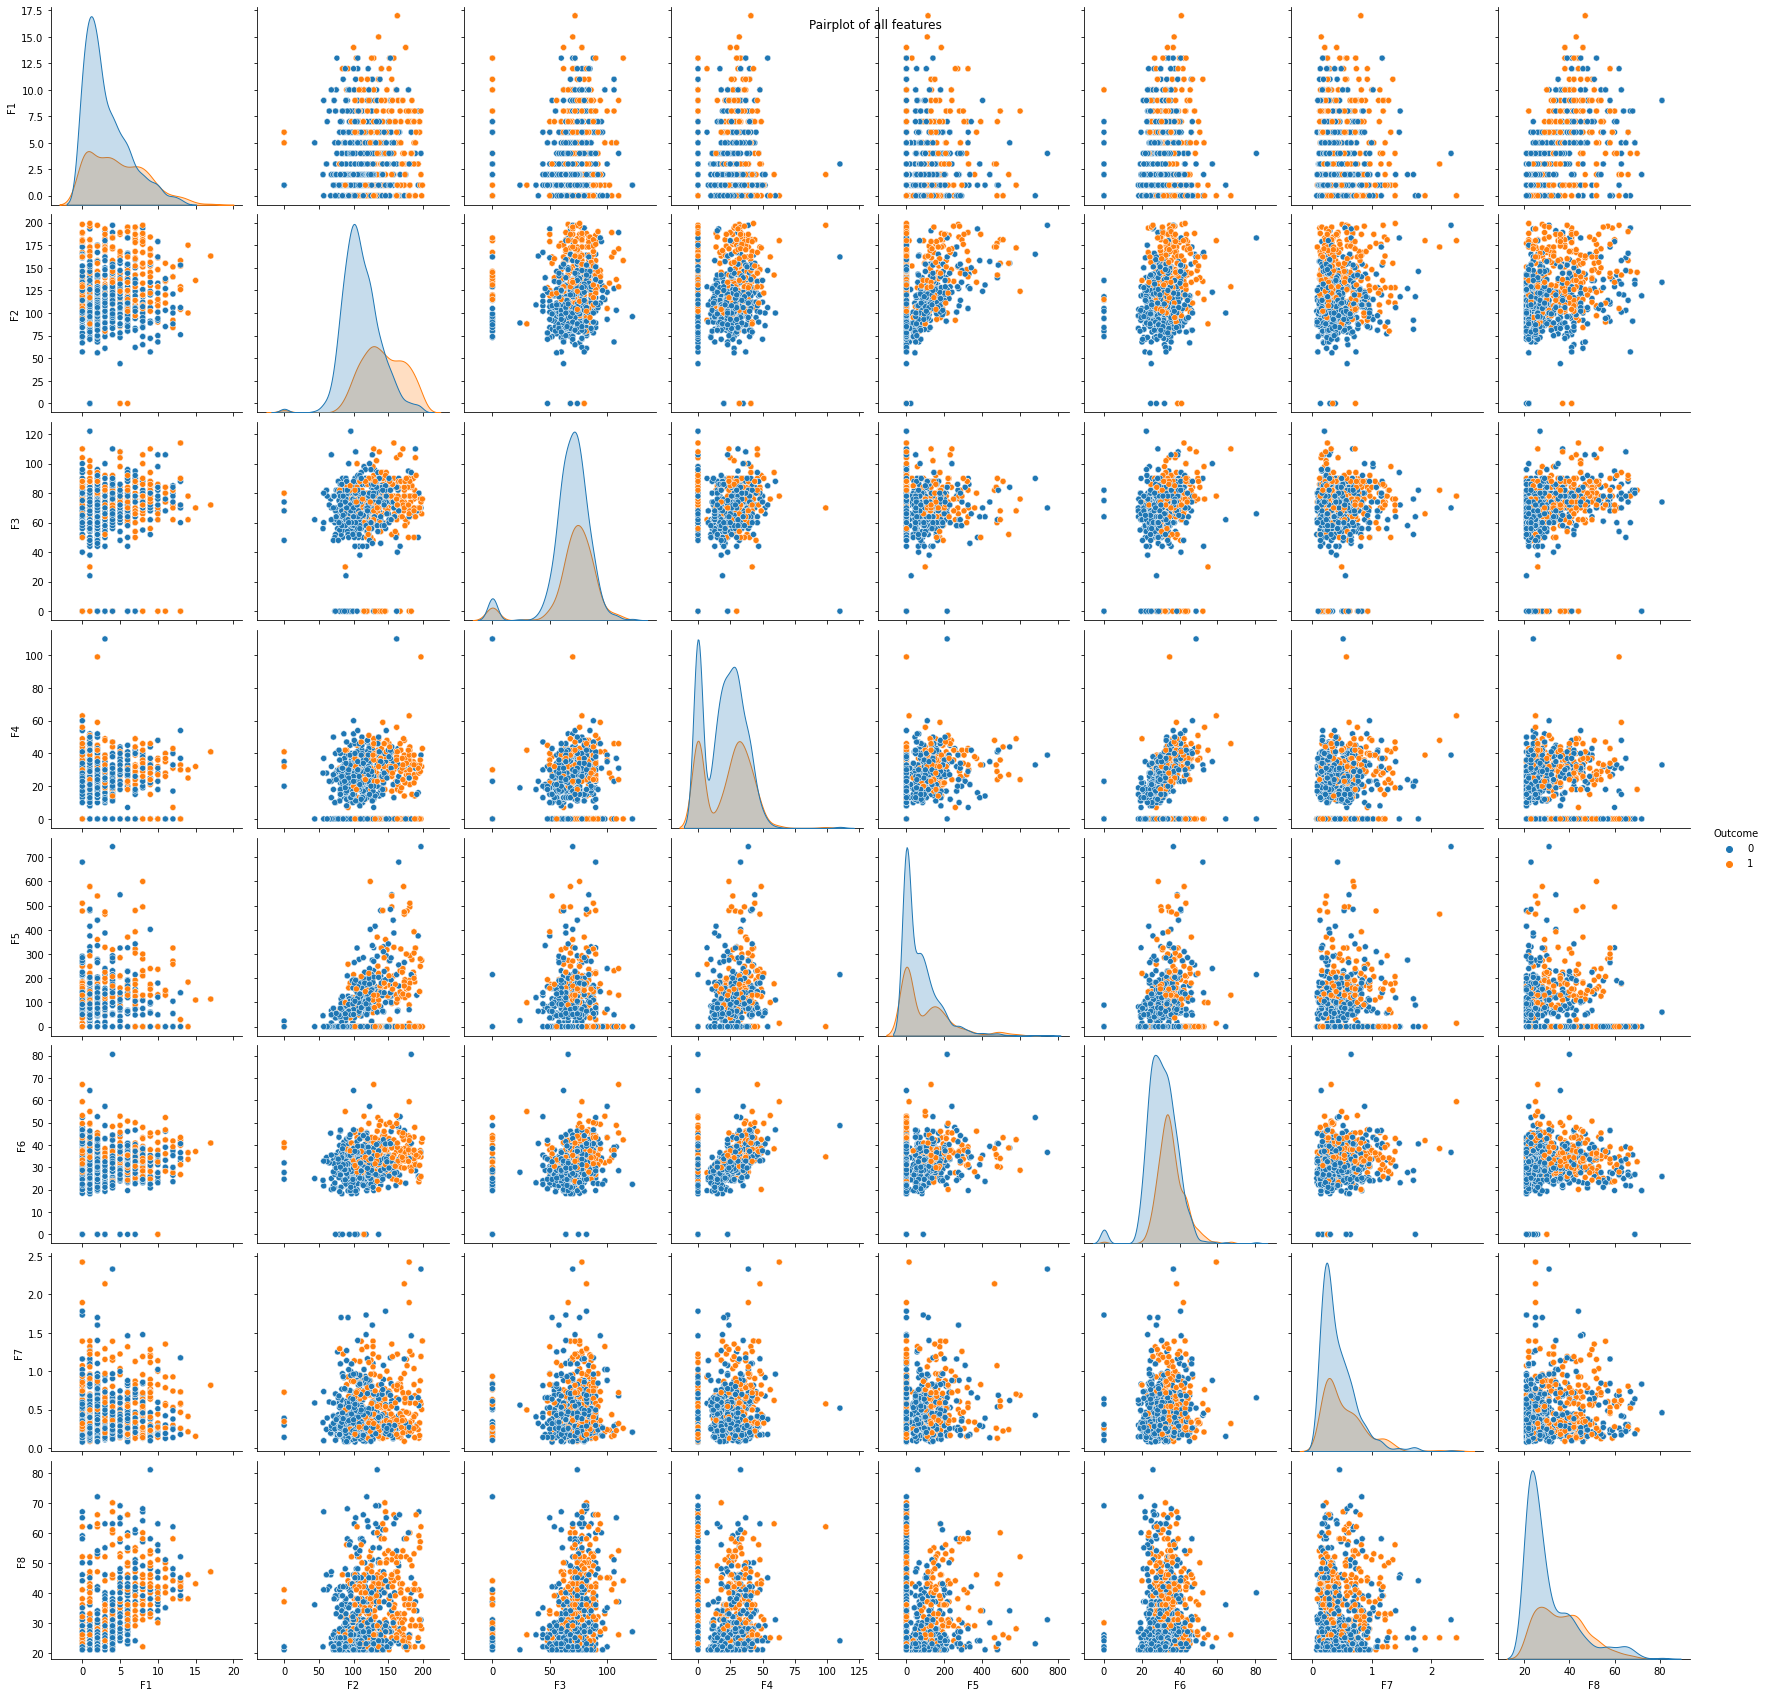

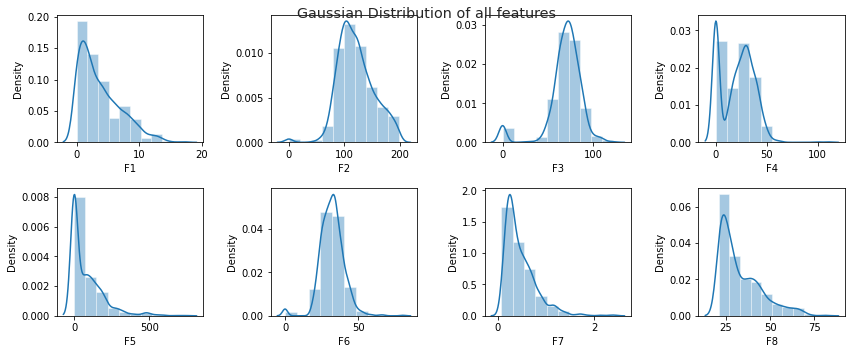

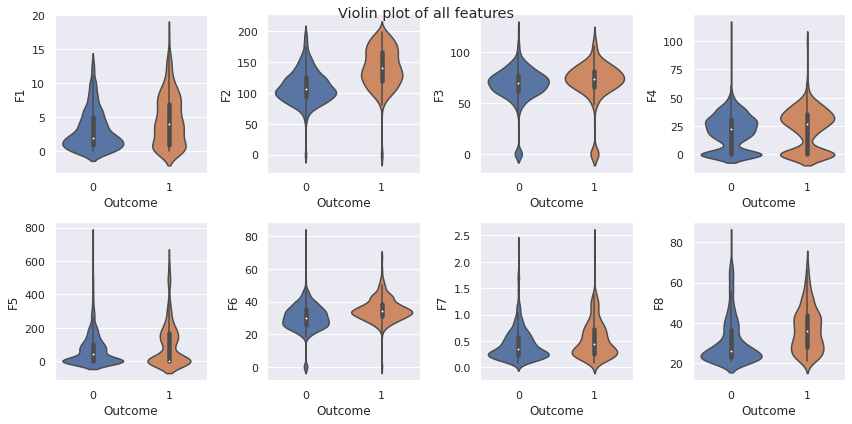

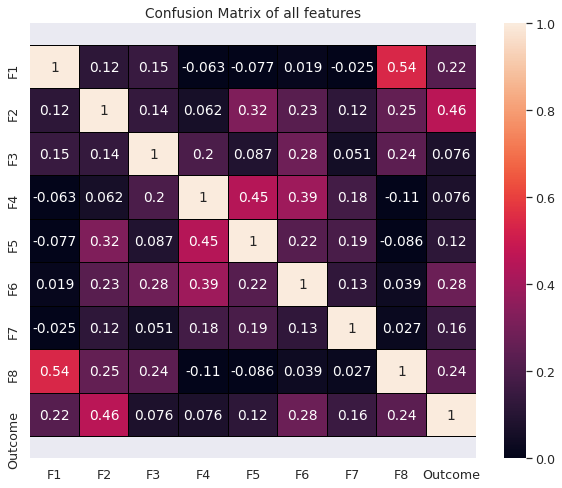

In [12]:
data_plot (data,
          Pair_plot=True,
          Dist_Plot=True,
          Plot_violinplot=True,
          Plot_confusionMatrix=True,
          box_Gaussian=False)

# Data Preprocessing  

In [13]:
print('Shape Before Process: ' + str(data.shape))
##########################################################################

## The process for the outlier rejection (P)

data = outlier_Rejection (data,
                  iqr_Mean=False,
                  iqr_Medain=False,
                  iqr=True,
                  manual=False)
print('Shape After outlier Removed: ' + str(data.shape))

##########################################################################

## The process for the filling missing values (Q)

for col in ['F2', 'F3', 'F4', 'F5', 'F6']:   
    replace_zero(data, col, 'Outcome')              
print('Shape After Filling Missing Value: ' + str(data.shape))
     

##########################################################################
#  algo parameters are
# 'PCA','ICA','corr','None'

X_Data,Y_Lavel = feature_Selector(data, algo='corr', n_feature=6)    
print('Shape After Feature Selection: ' + str(data.shape))


##########################################################################
# The process of Standardization  (S)
# scaler =  preprocessing.StandardScaler()
# X_Data,Y_Lavel= scaler.fit_transform(X_Data), Y_Lavel
# print('Shape After Standardization: ' + str(data.shape))          


##########################################################################
# Stratified K-Folds cross-validator
# Provides train/test indices to split
# data in train/test sets.This cross-validation
#  object is a variation of KFold that returns 
#  stratified folds. The folds are made by preserving 
#  the percentage of samples for each class.

kf = StratifiedKFold(n_splits=5,
                     shuffle=False,
                     random_state=random_initializer)

Shape Before Process: (2000, 9)
Shape After outlier Removed: (1652, 9)
Shape After Filling Missing Value: (1652, 9)
Shape After Feature Selection: (1652, 9)


# Processed Data Plot and Presenation

In [14]:
data_plot (data,
          Pair_plot=True,
          Dist_Plot=True,
          Plot_violinplot=True,
          Plot_confusionMatrix=True,
          box_Gaussian=False)

Output hidden; open in https://colab.research.google.com to view.

### Analyzing KNN model

--------------------------------------------------
Detailed classification report for current fold:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       229
           1       1.00      1.00      1.00       102

    accuracy                           1.00       331
   macro avg       1.00      1.00      1.00       331
weighted avg       1.00      1.00      1.00       331


Area Under ROC (AUC): 1.0

Confusion Matrix for current fold: 
[[229   0]
 [  0 102]]

Accuracy for Current Fold: 1.0

--------------------------------------------------
Detailed classification report for current fold:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       229
           1       0.99      1.00      1.00       102

    accuracy                           1.00       331
   macro avg       1.00      1.00      1.00       331
weighted avg       1.00      1.00      1.00       331


Area Under ROC (AUC): 0

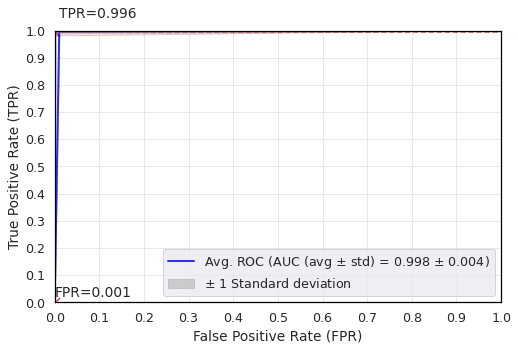


---------------------Average---------------------
AUC (Avg. +/- Std.) is  0.998 +/- 0.004
Accuracy (Avg. +/- Std.) is  0.998 +/- 0.002
Avg. CM is [[101, 0], [0, 228]]
Total for all folds CM is [[505, 1], [2, 1144]]


In [15]:
Accuracy = []                                                                # for store the value of accuracy 
FP = []                                                                      # for store False Positive 
TN = []                                                                      # for True Negative
FN = []                                                                      # for False Negative
TP = []                                                                      # for True Positive
tprs = []                                                                    # for true positive rates
aucs_kNN = []                                                                # for store the values of auc
iterator=0
mean_fpr = np.linspace(0, 1, 100)
fig = plt.figure(figsize=(8, 5))

for train_index, test_index in kf.split(X_Data,Y_Lavel):                     # split in train and test
    #   print("TRAIN:", train_index, "TEST:", test_index)
    X_Train, X_Test = X_Data[train_index], X_Data[test_index]                #train data and label
    Y_Train, Y_Test = Y_Lavel[train_index], Y_Lavel[test_index]              #test data and label

    ###########################################
    # define the hyper parameters of Knn
    n_neighbors = [1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31,33,35,37,39,41,43,45,47,49]
    leaf_size = [5,10,15,20,25,30,35,40,45,50]
    Distance = [1,2]
    ############################################


    tuned_parameters = [ {'n_neighbors': n_neighbors,                         #define parameters with different algorithm
                        'algorithm' : ['brute'],
                        'p':Distance},

                         {'n_neighbors': n_neighbors, 
                        'algorithm' : ['ball_tree'],
                        'leaf_size' : leaf_size,
                        'p':Distance},

                        {'n_neighbors': n_neighbors, 
                        'algorithm' : ['kd_tree'],
                        'leaf_size' : leaf_size,
                        'p':Distance}]

    clf = creat_Model (classifier = KNeighborsClassifier(),                     #create the model 
                      X_Train = X_Train,
                      Y_Train = Y_Train,
                      tuned_parameters = tuned_parameters,
                      verbose=0)

    tn, fp, fn, tp, roc_auc, fpr, tpr = metrics (y_true = Y_Test,               #get the values of  model evaluation 
                                                y_pred = clf.predict(X_Test),
                                                probas_ = clf.predict_proba(X_Test))
    tprs.append(interp(mean_fpr, fpr, tpr))                                     
    tprs[-1][0] = 0.0
    aucs_kNN.append(roc_auc)
    plot_Current_ROC (fpr,tpr,iterator,roc_auc)                                 #plot the roc of current fold
    iterator += 1
    TN.append(tn)
    FP.append(fp)
    FN.append(fn)
    TP.append(tp)
    Accuracy.append(accuracy_score(Y_Test, clf.predict(X_Test)))
average_ROC(mean_fpr,tprs,aucs_kNN,TP,TN,FP,FN)                                 #plot average roc curve
average_performance(aucs_kNN,Accuracy,TP,TN,FP,FN)                              #print the average performance of the model

### Analyzing  Decision Trees Classifier

--------------------------------------------------
Detailed classification report for current fold:

              precision    recall  f1-score   support

           0       0.93      0.87      0.90       229
           1       0.75      0.86      0.80       102

    accuracy                           0.87       331
   macro avg       0.84      0.87      0.85       331
weighted avg       0.88      0.87      0.87       331


Area Under ROC (AUC): 0.9294460142135457

Confusion Matrix for current fold: 
[[199  30]
 [ 14  88]]

Accuracy for Current Fold: 0.8670694864048338

--------------------------------------------------
Detailed classification report for current fold:

              precision    recall  f1-score   support

           0       0.93      0.87      0.90       229
           1       0.75      0.85      0.80       102

    accuracy                           0.87       331
   macro avg       0.84      0.86      0.85       331
weighted avg       0.87      0.87      0.87      

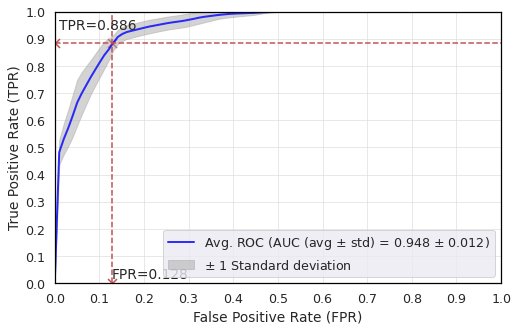


---------------------Average---------------------
AUC (Avg. +/- Std.) is  0.948 +/- 0.012
Accuracy (Avg. +/- Std.) is  0.877 +/- 0.013
Avg. CM is [[89, 29], [11, 199]]
Total for all folds CM is [[449, 146], [58, 999]]


In [16]:
Accuracy = []                                                                # for store the value of accuracy 
FP = []                                                                      # for store False Positive 
TN = []                                                                      # for True Negative
FN = []                                                                      # for False Negative
TP = []                                                                      # for True Positive
tprs = []                                                                    # for true positive rates
aucs_Tree = []                                                               # for store the values of auc of tree model
iterator=0
mean_fpr = np.linspace(0, 1, 100)
fig = plt.figure(figsize=(8, 5))

for train_index, test_index in kf.split(X_Data,Y_Lavel):
    #   print("TRAIN:", train_index, "TEST:", test_index)
    X_Train, X_Test = X_Data[train_index], X_Data[test_index]
    Y_Train, Y_Test = Y_Lavel[train_index], Y_Lavel[test_index]

                                                                            # define the decision tree parameters 

    tuned_parameters = {'criterion': ['gini','entropy'],
                       'splitter': ['best'],
                       'min_samples_split':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0],
                       'min_samples_leaf': [1,2,3,4,5] }

    clf = creat_Model (classifier = DecisionTreeClassifier( random_state=random_initializer),
                      X_Train = X_Train,                                    # create the model using DecisionTree Classifier 
                      Y_Train = Y_Train,
                      tuned_parameters = tuned_parameters,
                      verbose=0)

    tn, fp, fn, tp, roc_auc, fpr, tpr = metrics (y_true = Y_Test,           #get the evaluation parameters of model
                                                y_pred = clf.predict(X_Test),
                                                probas_ = clf.predict_proba(X_Test))
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    aucs_Tree.append(roc_auc)                                                # plot the roc of current fold
    iterator += 1
    TN.append(tn)
    FP.append(fp)
    FN.append(fn)
    TP.append(tp)
    Accuracy.append(accuracy_score(Y_Test, clf.predict(X_Test)))
average_ROC(mean_fpr,tprs,aucs_Tree,TP,TN,FP,FN)                             #plot average roc curve
average_performance(aucs_Tree,Accuracy,TP,TN,FP,FN)                          #print the average performance of the model

### Analyzing Random Forest Classifier

--------------------------------------------------
Detailed classification report for current fold:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       229
           1       1.00      1.00      1.00       102

    accuracy                           1.00       331
   macro avg       1.00      1.00      1.00       331
weighted avg       1.00      1.00      1.00       331


Area Under ROC (AUC): 0.9999999999999999

Confusion Matrix for current fold: 
[[229   0]
 [  0 102]]

Accuracy for Current Fold: 1.0

--------------------------------------------------
Detailed classification report for current fold:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       229
           1       0.99      1.00      1.00       102

    accuracy                           1.00       331
   macro avg       1.00      1.00      1.00       331
weighted avg       1.00      1.00      1.00       331


Area Und

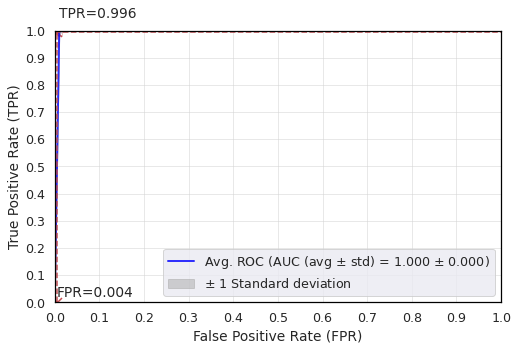


---------------------Average---------------------
AUC (Avg. +/- Std.) is  1.000 +/- 0.000
Accuracy (Avg. +/- Std.) is  0.996 +/- 0.007
Avg. CM is [[101, 1], [0, 228]]
Total for all folds CM is [[505, 5], [2, 1140]]


In [17]:
Accuracy = []                                                                # for store the value of accuracy 
FP = []                                                                      # for store False Positive 
TN = []                                                                      # for True Negative
FN = []                                                                      # for False Negative
TP = []                                                                      # for True Positive
tprs = []                                                                    # for true positive rates
aucs_Forest = []                                                             # for store the values of auc of Random Forest model
iterator=0
mean_fpr = np.linspace(0, 1, 100)
fig = plt.figure(figsize=(8, 5))

for train_index, test_index in kf.split(X_Data,Y_Lavel):                     #split dataset into train /test
#   print("TRAIN:", train_index, "TEST:", test_index)
    X_Train, X_Test = X_Data[train_index], X_Data[test_index]                # data and label of train dataset
    Y_Train, Y_Test = Y_Lavel[train_index], Y_Lavel[test_index]              # data and label of test dataset

    # parameters of Random Forest model
    tuned_parameters = {'criterion': ['gini','entropy']}

    clf = creat_Model (classifier = RandomForestClassifier( random_state=random_initializer),
                      X_Train = X_Train,                                      # create a model using random forest classifier
                      Y_Train = Y_Train,
                      tuned_parameters = tuned_parameters,
                      verbose=0)

    tn, fp, fn, tp, roc_auc, fpr, tpr = metrics (y_true = Y_Test,              #evaluation parameters of random forest model
                                                y_pred = clf.predict(X_Test),
                                                probas_ = clf.predict_proba(X_Test))
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    aucs_Forest.append(roc_auc)
    plot_Current_ROC (fpr,tpr,iterator,roc_auc)                               #plot the roc of current fold
    iterator += 1
    TN.append(tn)
    FP.append(fp)
    FN.append(fn)
    TP.append(tp)
    Accuracy.append(accuracy_score(Y_Test, clf.predict(X_Test)))
average_ROC(mean_fpr,tprs,aucs_Forest,TP,TN,FP,FN)                            #plot average roc curve
average_performance(aucs_Forest,Accuracy,TP,TN,FP,FN)                         #print the average performance of the model

### Analyzing AdaBoost Classifier

--------------------------------------------------
Detailed classification report for current fold:

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       229
           1       0.96      0.86      0.91       102

    accuracy                           0.95       331
   macro avg       0.95      0.92      0.93       331
weighted avg       0.95      0.95      0.94       331


Area Under ROC (AUC): 0.9891257813168935

Confusion Matrix for current fold: 
[[225   4]
 [ 14  88]]

Accuracy for Current Fold: 0.945619335347432

--------------------------------------------------
Detailed classification report for current fold:

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       229
           1       0.97      0.91      0.94       102

    accuracy                           0.96       331
   macro avg       0.97      0.95      0.96       331
weighted avg       0.96      0.96      0.96       

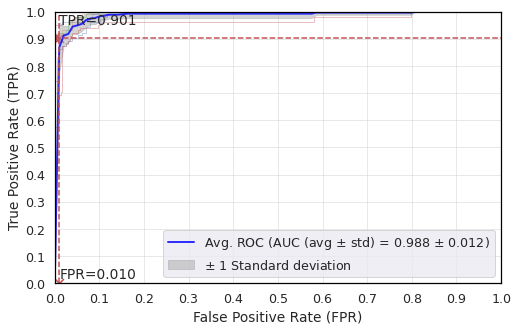


---------------------Average---------------------
AUC (Avg. +/- Std.) is  0.988 +/- 0.012
Accuracy (Avg. +/- Std.) is  0.962 +/- 0.015
Avg. CM is [[91, 2], [10, 226]]
Total for all folds CM is [[457, 12], [50, 1133]]


In [18]:
Accuracy = []                                                                # for store the value of accuracy 
FP = []                                                                      # for store False Positive 
TN = []                                                                      # for True Negative
FN = []                                                                      # for False Negative
TP = []                                                                      # for True Positive
tprs = []                                                                    # for true positive rates
aucs_aBoost = []                                                             # for store the values of auc of Adaboost model
iterator=0

mean_fpr = np.linspace(0, 1, 100)
fig = plt.figure(figsize=(8, 5))


for train_index, test_index in kf.split(X_Data,Y_Lavel):                     #split into train and test 
    #   print("TRAIN:", train_index, "TEST:", test_index)
    X_Train, X_Test = X_Data[train_index], X_Data[test_index]                #data and label
    Y_Train, Y_Test = Y_Lavel[train_index], Y_Lavel[test_index]              #data and label

    #####################################################
    # define the parameters of adaboost algorithm
    #####################################################
    tuned_parameters = { 'algorithm': ['SAMME','SAMME.R'],
                       'learning_rate':[0.1,0.5,1.0],
                       'n_estimators': [10,50,100,200]}

    
    clf = creat_Model (classifier = AdaBoostClassifier( random_state=random_initializer),
                      X_Train = X_Train,                                      # create a model using  AdaBoost Classifier
                      Y_Train = Y_Train,
                      tuned_parameters = tuned_parameters,
                      verbose=0)
    tn, fp, fn, tp, roc_auc, fpr, tpr = metrics (y_true = Y_Test,             # model evaluation parametrs
                                                y_pred = clf.predict(X_Test),
                                                probas_ = clf.predict_proba(X_Test))
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    aucs_aBoost.append(roc_auc)
    plot_Current_ROC (fpr,tpr,iterator,roc_auc)                              #plot the roc of current fold
    iterator += 1
    TN.append(tn)
    FP.append(fp)
    FN.append(fn)
    TP.append(tp)
    Accuracy.append(accuracy_score(Y_Test, clf.predict(X_Test)))
average_ROC(mean_fpr,tprs,aucs_aBoost,TP,TN,FP,FN)                           #plot average roc curve
average_performance(aucs_aBoost,Accuracy,TP,TN,FP,FN)                        #print the average performance of the model

### Analyzing Naive Bayes Model

--------------------------------------------------
Detailed classification report for current fold:

              precision    recall  f1-score   support

           0       0.82      0.89      0.85       229
           1       0.70      0.56      0.62       102

    accuracy                           0.79       331
   macro avg       0.76      0.72      0.74       331
weighted avg       0.78      0.79      0.78       331


Area Under ROC (AUC): 0.8616748009247367

Confusion Matrix for current fold: 
[[204  25]
 [ 45  57]]

Accuracy for Current Fold: 0.7885196374622356

--------------------------------------------------
Detailed classification report for current fold:

              precision    recall  f1-score   support

           0       0.84      0.89      0.87       229
           1       0.72      0.63      0.67       102

    accuracy                           0.81       331
   macro avg       0.78      0.76      0.77       331
weighted avg       0.80      0.81      0.81      

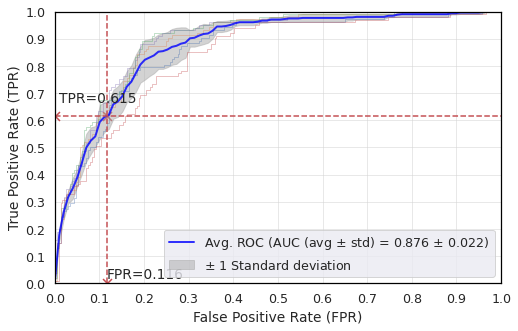


---------------------Average---------------------
AUC (Avg. +/- Std.) is  0.876 +/- 0.022
Accuracy (Avg. +/- Std.) is  0.801 +/- 0.020
Avg. CM is [[62, 26], [39, 202]]
Total for all folds CM is [[312, 133], [195, 1012]]


In [19]:
Accuracy = []                                                                # for store the value of accuracy 
FP = []                                                                      # for store False Positive 
TN = []                                                                      # for True Negative
FN = []                                                                      # for False Negative
TP = []                                                                      # for True Positive
tprs = []                                                                    # for true positive rates
aucs_NB = []                                                                 # for store the values of auc of  model
iterator=0

mean_fpr = np.linspace(0, 1, 100) 
fig = plt.figure(figsize=(8, 5))


for train_index, test_index in kf.split(X_Data,Y_Lavel):                     #split into train and test
#   print("TRAIN:", train_index, "TEST:", test_index)
    X_Train, X_Test = X_Data[train_index], X_Data[test_index]                #train data and label
    Y_Train, Y_Test = Y_Lavel[train_index], Y_Lavel[test_index]              #test  data and label


    #############################################
    # define parameters of Naive Bayes model 
    ############################################
    var_smoothing = [1e-01,
                    1e-02,
                    1e-03,
                    1e-04,
                    1e-05,
                    1e-06,
                    1e-07,
                    1e-08,
                    1e-09,
                    1e-10,
                    1e-11,
                    1e-12]

    tuned_parameters = [{'var_smoothing': var_smoothing}]

    #############################################################
    clf = creat_Model (classifier = GaussianNB(),                             # create model using Naive Bias
                      X_Train = X_Train,
                      Y_Train = Y_Train,
                      tuned_parameters = tuned_parameters,
                      verbose=0)
    tn, fp, fn, tp, roc_auc, fpr, tpr = metrics (y_true = Y_Test,             # model evaluation parameters
                                                y_pred = clf.predict(X_Test),
                                                probas_ = clf.predict_proba(X_Test))
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    aucs_NB.append(roc_auc)
    plot_Current_ROC (fpr,tpr,iterator,roc_auc)                               #plot the roc of current fold
    iterator += 1
    TN.append(tn)
    FP.append(fp)
    FN.append(fn)
    TP.append(tp)
    Accuracy.append(accuracy_score(Y_Test, clf.predict(X_Test)))
average_ROC(mean_fpr,tprs,aucs_NB,TP,TN,FP,FN)                               #plot average roc curve
average_performance(aucs_NB,Accuracy,TP,TN,FP,FN)                            #print the average performance of the model

### Analyzing XGBoost Model

--------------------------------------------------
Detailed classification report for current fold:

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       229
           1       0.99      0.97      0.98       102

    accuracy                           0.99       331
   macro avg       0.99      0.98      0.99       331
weighted avg       0.99      0.99      0.99       331


Area Under ROC (AUC): 0.9990581385392585

Confusion Matrix for current fold: 
[[228   1]
 [  3  99]]

Accuracy for Current Fold: 0.9879154078549849

--------------------------------------------------
Detailed classification report for current fold:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       229
           1       0.99      1.00      1.00       102

    accuracy                           1.00       331
   macro avg       1.00      1.00      1.00       331
weighted avg       1.00      1.00      1.00      

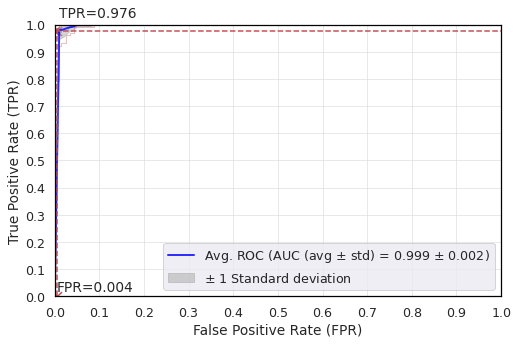


---------------------Average---------------------
AUC (Avg. +/- Std.) is  0.999 +/- 0.002
Accuracy (Avg. +/- Std.) is  0.990 +/- 0.012
Avg. CM is [[99, 1], [2, 228]]
Total for all folds CM is [[495, 5], [12, 1140]]
Sensitivity (Avg. +/- Std.) is  0.976 +/- 0.030
Specificity (Avg. +/- Std.) is  0.996 +/- 0.005
Precision (Avg. +/- Std.) is  0.990 +/- 0.011
FOR (Avg. +/- Std.) is  0.010 +/- 0.013
DOR (Avg. +/- Std.) is  inf +/- nan


In [20]:
Accuracy = []                                                                # for store the value of accuracy 
FP = []                                                                      # for store False Positive 
TN = []                                                                      # for True Negative
FN = []                                                                      # for False Negative
TP = []                                                                      # for True Positive
tprs = []                                                                    # for true positive rates
aucs_xboost = []                                                                # for store the values of auc
sn = []                                                                      # for sensitivity 
sp = []                                                                      # for specificity
pr = []                                                                      # for precision
FOR = []                                                                     # for False omission rate 
DOR = []                                                                     # for Diagnostic odds ratio (DOR)
iterator=0
mean_fpr = np.linspace(0, 1, 100)
fig = plt.figure(figsize=(8, 5))


for train_index, test_index in kf.split(X_Data,Y_Lavel):                     # split into train and test
#   print("TRAIN:", train_index, "TEST:", test_index)
    X_Train, X_Test = X_Data[train_index], X_Data[test_index]                #train data and label
    Y_Train, Y_Test = Y_Lavel[train_index], Y_Lavel[test_index]              #test data and label

    #####################################
    ## define the parameters 
    ######################################
    tuned_parameters = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.5, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

    clf = creat_Model (classifier = xgb.XGBClassifier(objective = "binary:logistic", eval_metric = 'error', random_state=random_initializer),
                      X_Train = X_Train,                                        # create model using XGB classifier 
                      Y_Train = Y_Train,
                      tuned_parameters = tuned_parameters,
                      verbose=0)
    tn, fp, fn, tp, roc_auc, fpr, tpr = metrics (y_true = Y_Test,               #evaluate the model parameters
                                                y_pred = clf.predict(X_Test),
                                                probas_ = clf.predict_proba(X_Test))
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    aucs_xboost.append(roc_auc)
    plot_Current_ROC(fpr,tpr,iterator,roc_auc)                                  #plot the roc of current fold 
    iterator += 1
    TN.append(tn)
    FP.append(fp)
    FN.append(fn)
    TP.append(tp)
    Accuracy.append(accuracy_score(Y_Test, clf.predict(X_Test)))
    sn.append(tp/(tp+fn))
    sp.append(tn/(fp+tn))
    pr.append(tp/(tp+fp))
    FOR.append(fn/(tn+fn))
    DOR.append((tp*tn)/(fp*fn))

average_ROC(mean_fpr,tprs,aucs_xboost,TP,TN,FP,FN)                              #plot average roc curve
average_performance(aucs_xboost,Accuracy,TP,TN,FP,FN)                           #print the average performance of the model

#####################################################################
#    print the sensitivity,specificity,precision,for,dor of model
#####################################################################
print("Sensitivity (Avg. +/- Std.) is  %0.3f +/- %0.3f" %(np.mean(sn),np.std(sn)))
print("Specificity (Avg. +/- Std.) is  %0.3f +/- %0.3f" %(np.mean(sp),np.std(sp)))
print("Precision (Avg. +/- Std.) is  %0.3f +/- %0.3f" %(np.mean(pr),np.std(pr)))
print("FOR (Avg. +/- Std.) is  %0.3f +/- %0.3f" %(np.mean(FOR),np.std(FOR)))
print("DOR (Avg. +/- Std.) is  %0.3f +/- %0.3f" %(np.mean(DOR),np.std(DOR)))

### Output aucs of all model store in a text file

In [22]:
algs=['k-nn','dt','rf','ab','nb','xb']

file = open('final_individual_classifer_output.txt','w') 
file.write('k-nn'+'-'*21+'dt'+'-'*12+'rf'+'-'*10+'ab'+'-'*21+'nb'+'-'*21+'xb') 
file.write('\n') 
file.write(all_clf_res[0]+'-'*5+all_clf_res[1]+'-'*3+all_clf_res[2]+'-'*3+all_clf_res[3]+'-'*8+all_clf_res[4]+'-'*9+all_clf_res[5])
file.write('\n')

file.close()